In [19]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
datos = pd.read_csv("/content/drive/My Drive/Entrenamieto_ECI_2020.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from cycler import cycler
from math import pi

In [20]:
datos = datos.loc[datos["ASP"] != 0]

In [21]:
datos["Total_Amount_converted"] = datos["Total_Amount"] * datos["ASP_(converted)"] / datos["ASP"] #Convierto a dolares

In [31]:
datos["Stage_i"] = (datos["Stage"] == "Closed Won").astype(int)
tres_op_type = datos["Region"].value_counts().nlargest(3).reset_index()["index"]
datos_cortos_op = datos.loc[datos["Region"].isin(tres_op_type)]

In [35]:
datos_plot = datos_cortos_op.groupby("Region").agg({"TRF" : ["mean","max"],"ASP_(converted)" : "mean","Stage_i" : "mean","Total_Amount_converted" : "mean"})
datos_plot_ = datos_plot / datos_plot.sum()
datos_plot_

TRF           ASP_(converted)   Stage_i Total_Amount_converted
              mean       max            mean      mean                   mean
Region                                                                       
Americas  0.620249  0.531350        0.317247  0.274707               0.635645
EMEA      0.351533  0.425080        0.307028  0.321146               0.303061
Japan     0.028218  0.043571        0.375725  0.404148               0.061294

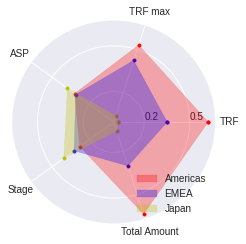

In [36]:
ax = plt.subplot(122,polar="True")
cat = ["TRF","TRF max","ASP","Stage","Total Amount"]
values = [datos_plot_.iloc[i,:].values.tolist() for i in range(3)]
values = [(v + v[:1]) for v in values]
values += values[:1]
angles = [n / float(len(cat)) * 2 * pi for n in range(len(cat))]
angles += angles[:1]
colors = ["r","b","y"]
for val,c in zip(values,colors):
  plt.scatter(angles,val,marker=".",color=c)
  plt.fill(angles,val,alpha=0.3,color=c)
plt.xticks(angles[:-1],cat)
ax.set_rlabel_position(0)
style.use("seaborn")
plt.yticks([0.2,0.5])
plt.legend(datos_plot_.index,loc="lower right")

plt.show()